In [1]:
import os
import tensorflow as tf
import random
import matplotlib
#matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import numpy as np
import config

In [2]:
FLAGS = tf.app.flags.FLAGS

In [3]:
def get_filename_set(data_set):
    labels = []
    filename_set = []

    with open(FLAGS.data_dir + '/labels.txt') as f:
        for line in f:
            inner_list = [elt.strip() for elt in line.split(',')]
            labels += inner_list

    for i, lable in enumerate(labels): #Label 폴더 안에 파일들을 찾고 리스트에 입력
        list = os.listdir(FLAGS.data_dir  + '/' + data_set + '/' + lable)
        for filename in list:
            filename_set.append([i, FLAGS.data_dir  + '/' + data_set + '/' + lable + '/' + filename])

    random.shuffle(filename_set) # 파일이름과 라벨에 해당하는 번호를 묶어서 추가하고 Random하게 섞어줌
    return filename_set

In [4]:
def read_jpeg(filename):
    value = tf.read_file(filename)
    decoded_image = tf.image.decode_jpeg(value, channels=FLAGS.depth)
    resized_image = tf.image.resize_images(decoded_image, [FLAGS.raw_height, FLAGS.raw_width])
    resized_image = tf.cast(resized_image, tf.uint8)
    
    return resized_image

In [5]:
def convert_images(sess, data_set):
    filename_set = get_filename_set(data_set)

    with open('./data/' + data_set + '_data_proamo.bin', 'wb') as f: #.bin 파일 생성
        for i in range(0, len(filename_set)):
            resized_image = read_jpeg(filename_set[i][1])
            #파일이름과 라벨이 있는 filename_set을 read_jpeg를 통해 변환
            try:
                image = sess.run(resized_image)
            except Exception as e:
                print(e.message)
                continue

            plt.imshow(np.reshape(image.data, [FLAGS.raw_height, FLAGS.raw_width, FLAGS.depth]))
            plt.show()

            print(i, filename_set[i][0], image.shape)
            f.write(chr(filename_set[i][0]).encode())
            f.write(image.data)

In [6]:
def read_raw_images(sess, data_set):
    filename = ['./data/' + data_set + '_data_proamo.bin']
    filename_queue = tf.train.string_input_producer(filename)

    #config의 크기로 record byte의 크기 설정
    record_bytes = (FLAGS.raw_height) * (FLAGS.raw_width) * FLAGS.depth + 1
    reader = tf.FixedLengthRecordReader(record_bytes=record_bytes)
    key, value = reader.read(filename_queue)
    record_bytes = tf.decode_raw(value, tf.uint8)

    tf.train.start_queue_runners(sess=sess)

    for i in range(0, 448):
        result = sess.run(record_bytes)
        print(i)
        for j in range(0, 41472):
            print(result[j])
        image = result[1:len(result)]


In [7]:
def main(argv = None):
    with tf.Session() as sess:
        convert_images(sess, 'train')
        convert_images(sess, 'eval')
        #read_raw_images(sess, 'eval')

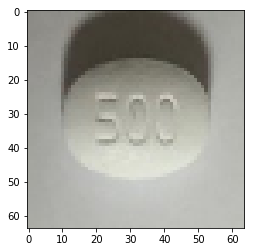

0 0 (64, 64, 3)


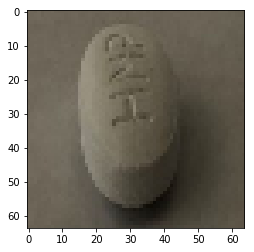

1 0 (64, 64, 3)


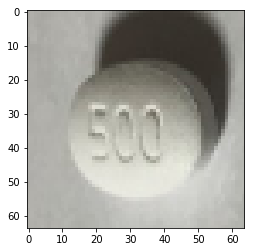

2 0 (64, 64, 3)


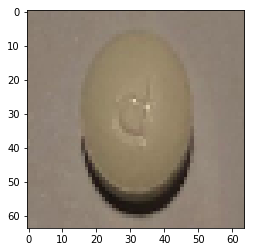

3 1 (64, 64, 3)


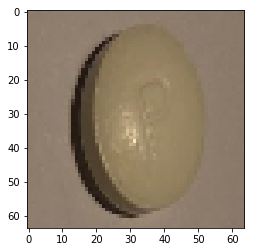

4 1 (64, 64, 3)


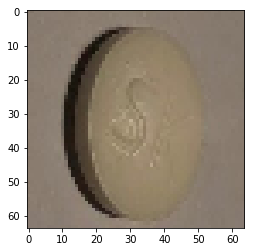

5 1 (64, 64, 3)


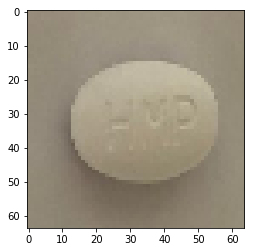

6 0 (64, 64, 3)


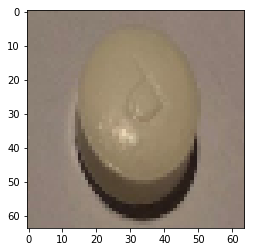

7 1 (64, 64, 3)


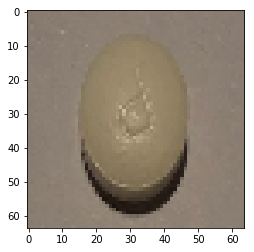

8 1 (64, 64, 3)


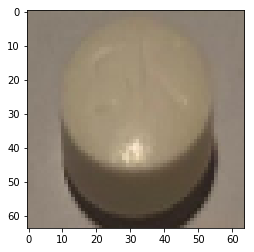

9 1 (64, 64, 3)


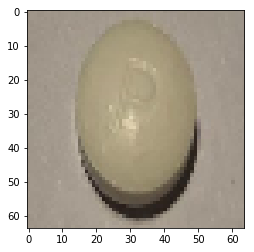

10 1 (64, 64, 3)


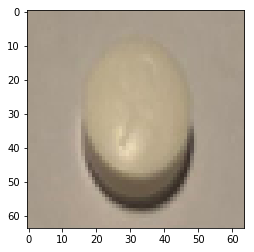

11 1 (64, 64, 3)


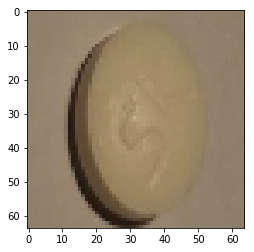

12 1 (64, 64, 3)


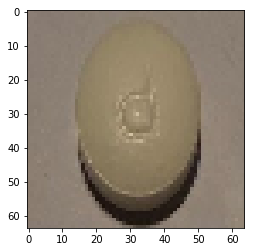

13 1 (64, 64, 3)


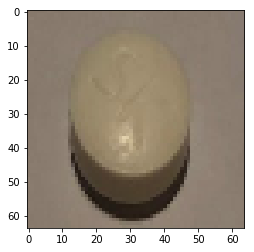

14 1 (64, 64, 3)


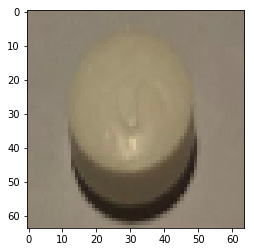

15 1 (64, 64, 3)


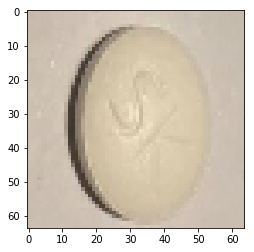

16 1 (64, 64, 3)


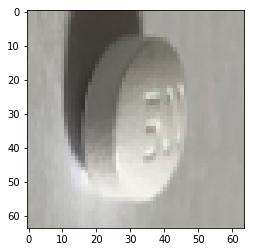

17 0 (64, 64, 3)


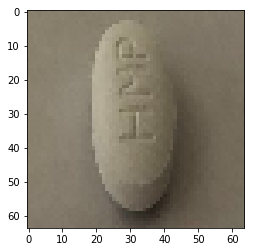

18 0 (64, 64, 3)


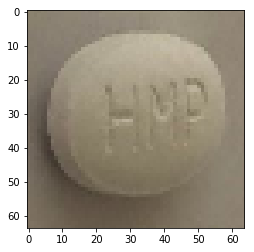

19 0 (64, 64, 3)


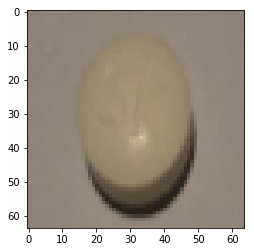

20 1 (64, 64, 3)


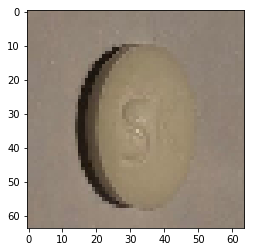

21 1 (64, 64, 3)


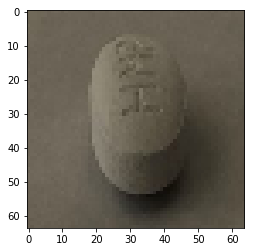

22 0 (64, 64, 3)


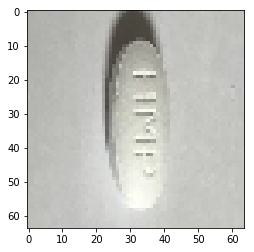

23 0 (64, 64, 3)


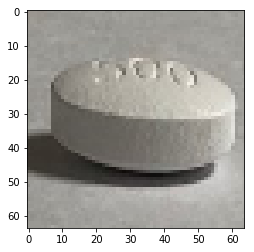

24 0 (64, 64, 3)


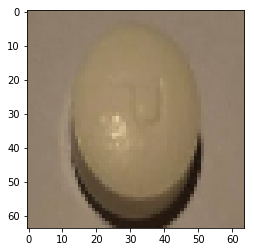

25 1 (64, 64, 3)


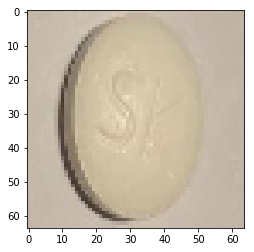

26 1 (64, 64, 3)


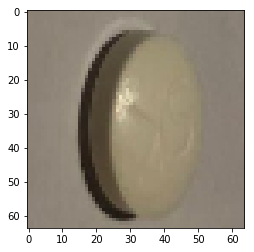

27 1 (64, 64, 3)


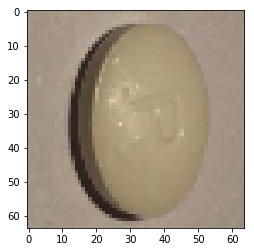

28 1 (64, 64, 3)


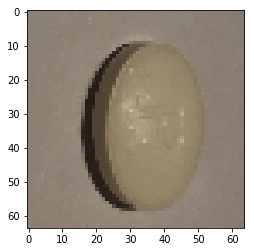

29 1 (64, 64, 3)


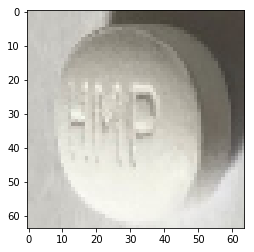

30 0 (64, 64, 3)


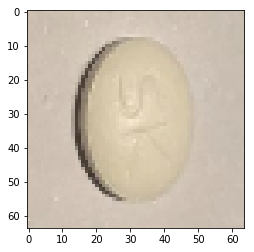

31 1 (64, 64, 3)


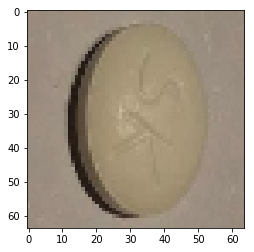

32 1 (64, 64, 3)


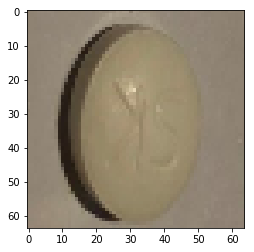

33 1 (64, 64, 3)


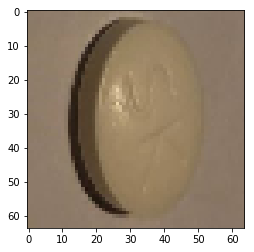

34 1 (64, 64, 3)


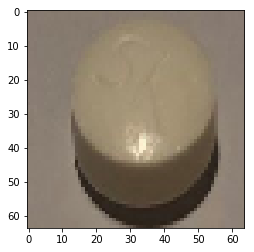

35 1 (64, 64, 3)


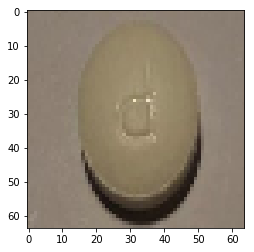

36 1 (64, 64, 3)


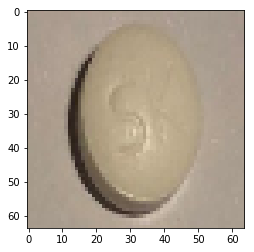

37 1 (64, 64, 3)


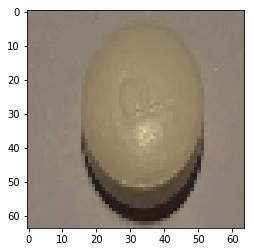

38 1 (64, 64, 3)


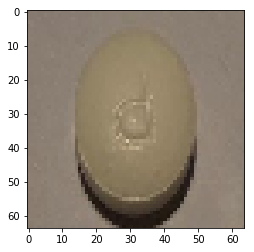

39 1 (64, 64, 3)


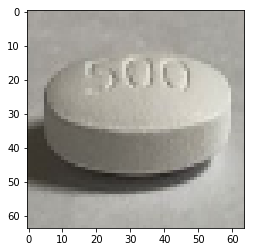

40 0 (64, 64, 3)


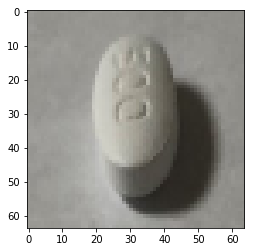

41 0 (64, 64, 3)


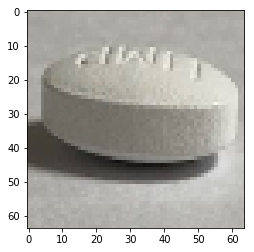

42 0 (64, 64, 3)


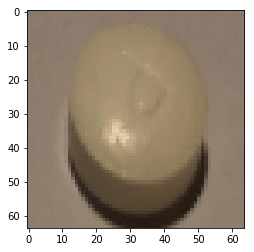

43 1 (64, 64, 3)


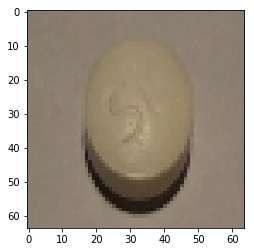

44 1 (64, 64, 3)


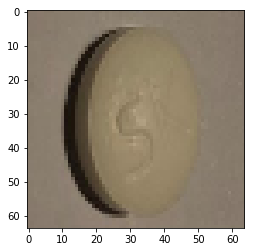

45 1 (64, 64, 3)


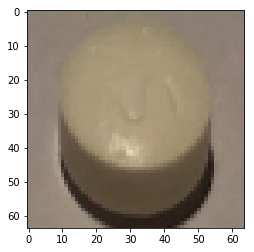

46 1 (64, 64, 3)


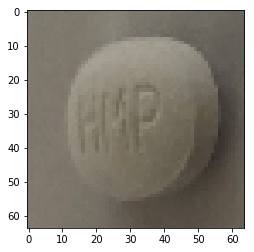

47 0 (64, 64, 3)


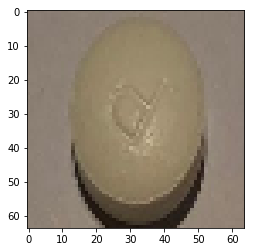

48 1 (64, 64, 3)


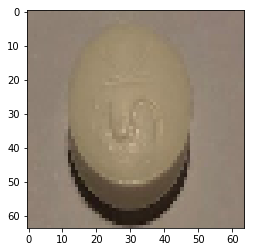

49 1 (64, 64, 3)


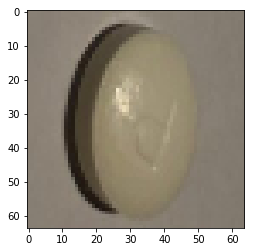

50 1 (64, 64, 3)


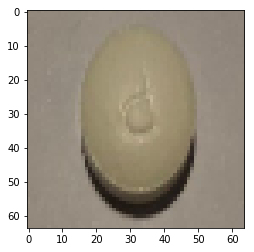

51 1 (64, 64, 3)


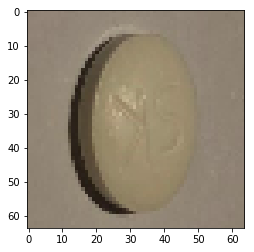

52 1 (64, 64, 3)


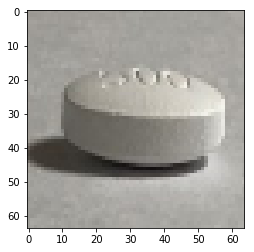

53 0 (64, 64, 3)


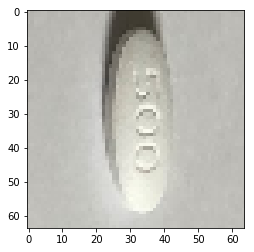

54 0 (64, 64, 3)


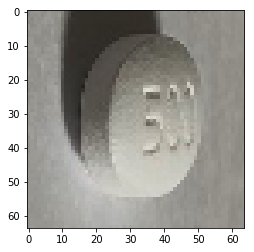

55 0 (64, 64, 3)


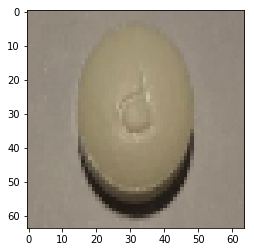

56 1 (64, 64, 3)


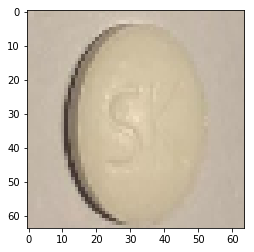

57 1 (64, 64, 3)


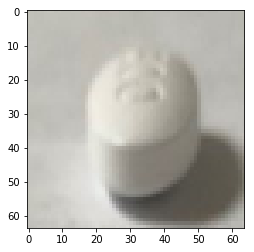

58 0 (64, 64, 3)


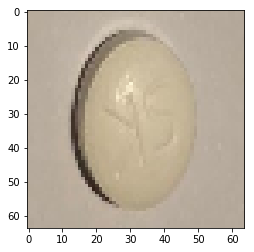

59 1 (64, 64, 3)


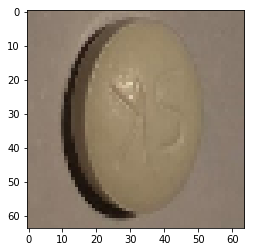

60 1 (64, 64, 3)


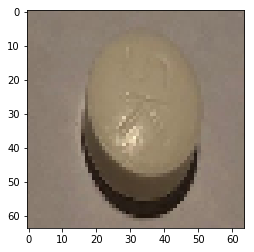

61 1 (64, 64, 3)


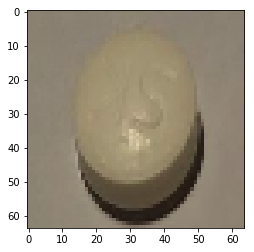

62 1 (64, 64, 3)


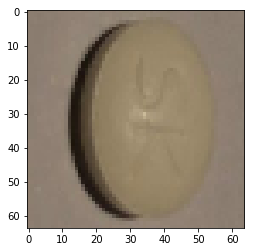

63 1 (64, 64, 3)


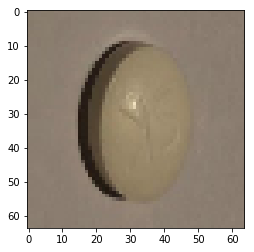

64 1 (64, 64, 3)


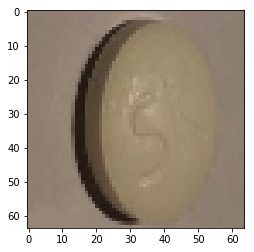

65 1 (64, 64, 3)


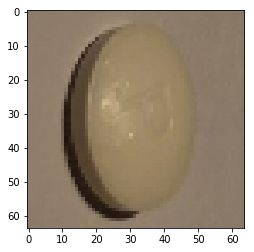

66 1 (64, 64, 3)


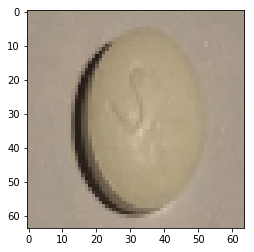

67 1 (64, 64, 3)


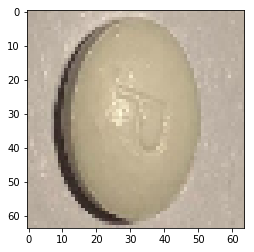

68 1 (64, 64, 3)


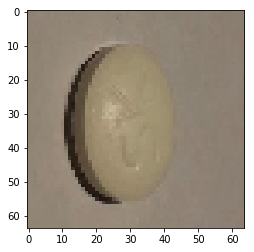

69 1 (64, 64, 3)


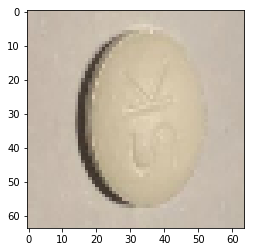

70 1 (64, 64, 3)


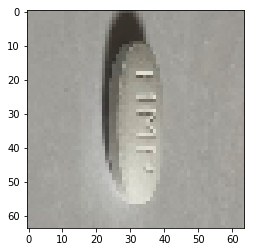

71 0 (64, 64, 3)


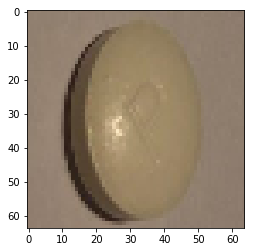

72 1 (64, 64, 3)


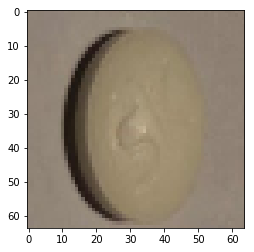

73 1 (64, 64, 3)


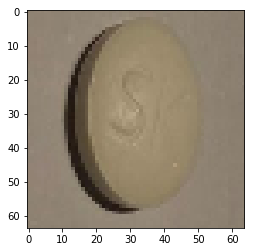

74 1 (64, 64, 3)


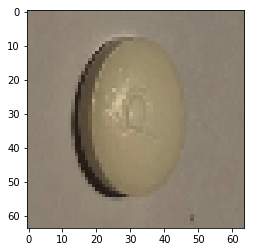

75 1 (64, 64, 3)


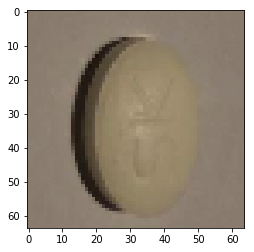

76 1 (64, 64, 3)


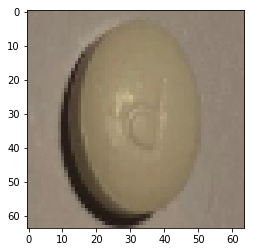

77 1 (64, 64, 3)


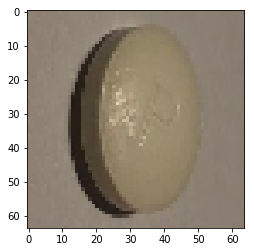

78 1 (64, 64, 3)


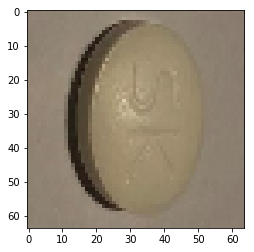

79 1 (64, 64, 3)


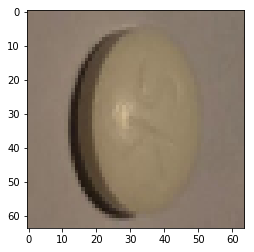

80 1 (64, 64, 3)


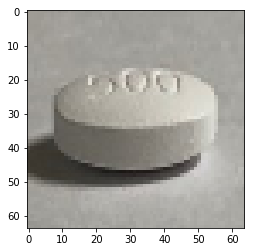

81 0 (64, 64, 3)


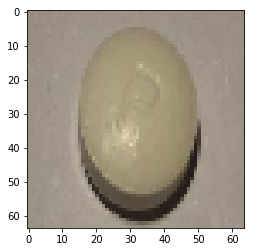

82 1 (64, 64, 3)


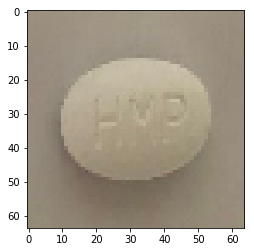

83 0 (64, 64, 3)


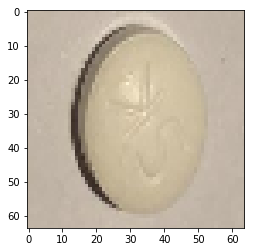

84 1 (64, 64, 3)


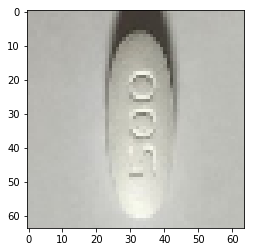

85 0 (64, 64, 3)


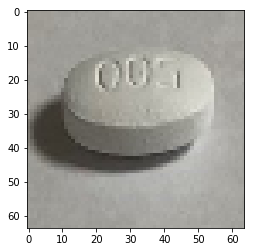

86 0 (64, 64, 3)


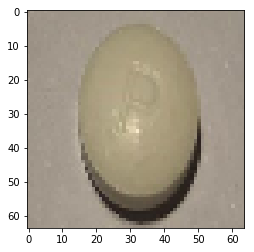

87 1 (64, 64, 3)


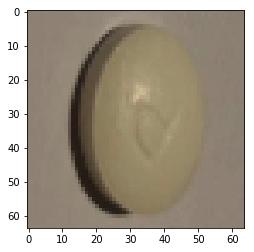

88 1 (64, 64, 3)


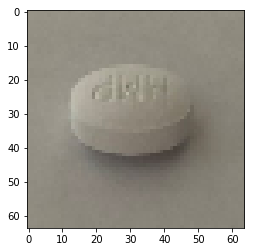

89 0 (64, 64, 3)


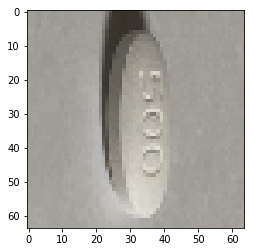

90 0 (64, 64, 3)


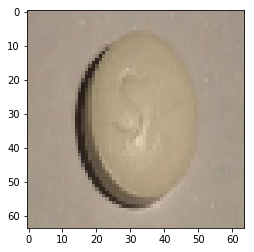

91 1 (64, 64, 3)


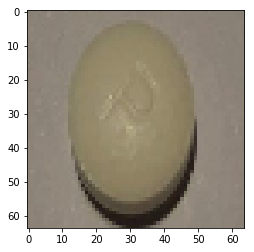

92 1 (64, 64, 3)


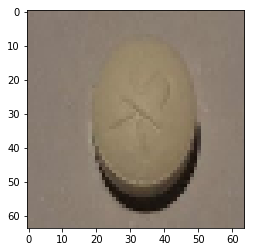

93 1 (64, 64, 3)


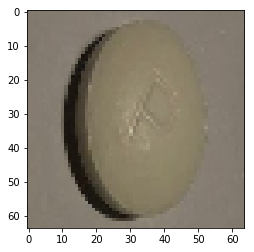

94 1 (64, 64, 3)


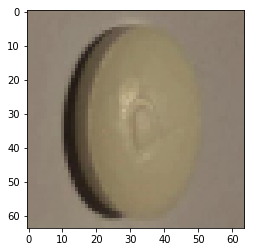

95 1 (64, 64, 3)


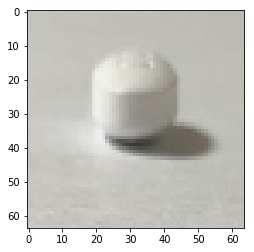

96 0 (64, 64, 3)


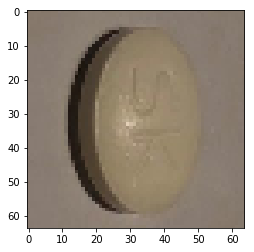

97 1 (64, 64, 3)


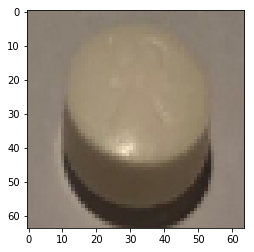

98 1 (64, 64, 3)


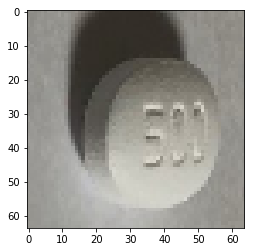

99 0 (64, 64, 3)


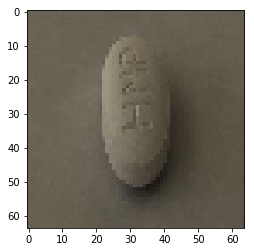

100 0 (64, 64, 3)


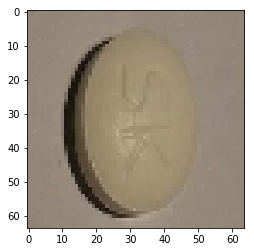

101 1 (64, 64, 3)


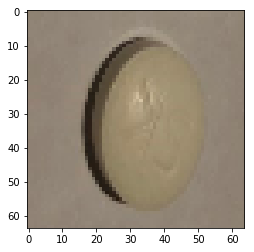

102 1 (64, 64, 3)


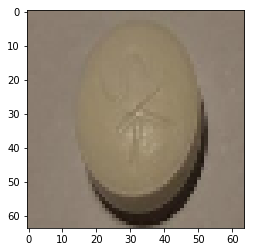

103 1 (64, 64, 3)


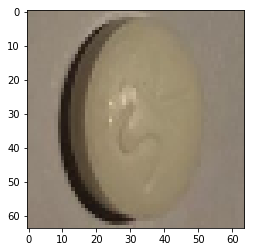

104 1 (64, 64, 3)


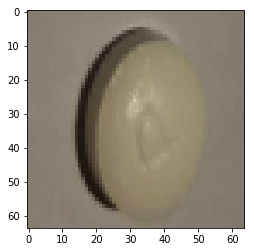

105 1 (64, 64, 3)


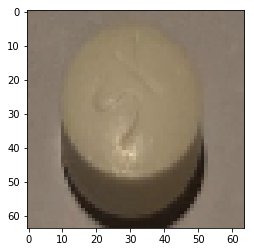

106 1 (64, 64, 3)


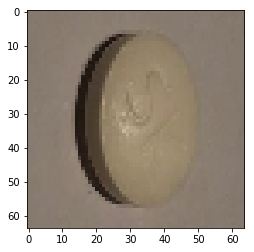

107 1 (64, 64, 3)


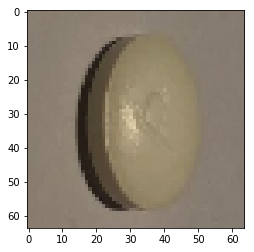

108 1 (64, 64, 3)


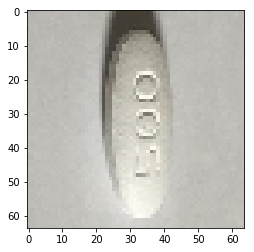

109 0 (64, 64, 3)


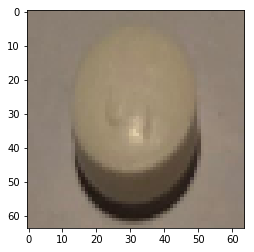

110 1 (64, 64, 3)


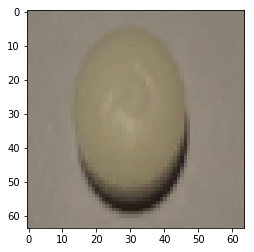

111 1 (64, 64, 3)


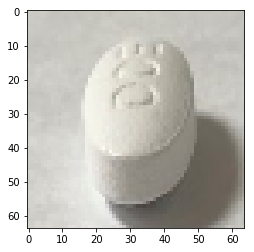

112 0 (64, 64, 3)


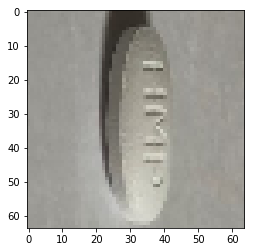

113 0 (64, 64, 3)


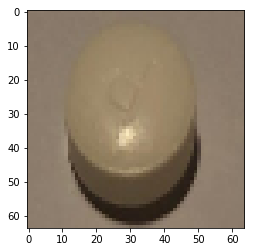

114 1 (64, 64, 3)


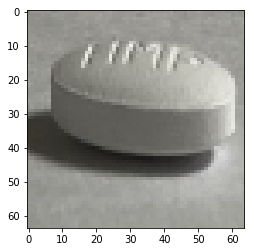

115 0 (64, 64, 3)


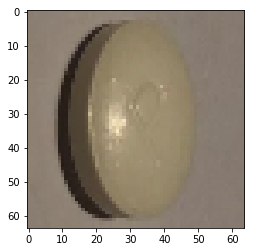

116 1 (64, 64, 3)


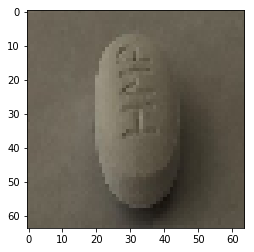

117 0 (64, 64, 3)


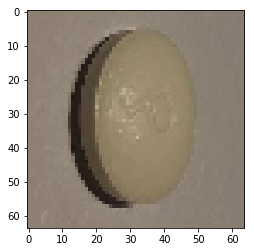

118 1 (64, 64, 3)


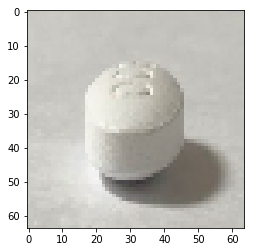

119 0 (64, 64, 3)


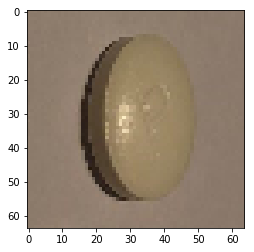

120 1 (64, 64, 3)


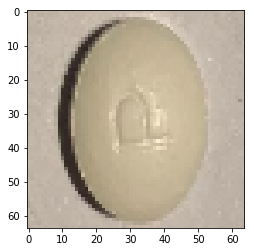

121 1 (64, 64, 3)


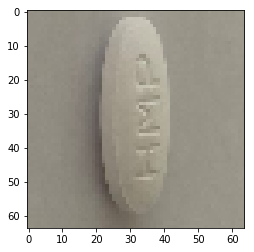

122 0 (64, 64, 3)


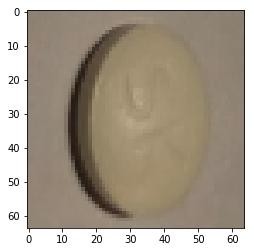

123 1 (64, 64, 3)


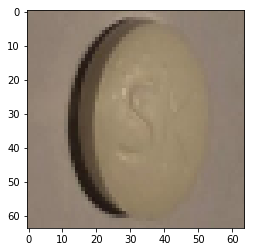

124 1 (64, 64, 3)


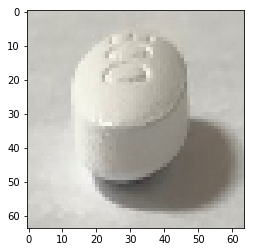

125 0 (64, 64, 3)


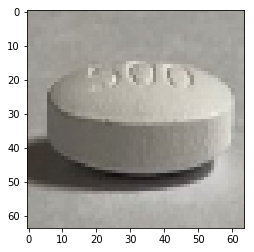

126 0 (64, 64, 3)


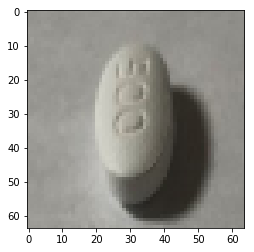

127 0 (64, 64, 3)


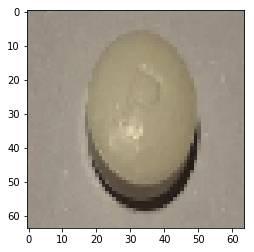

128 1 (64, 64, 3)


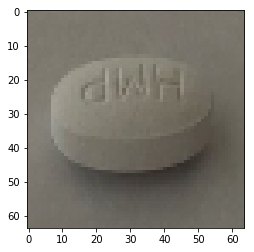

129 0 (64, 64, 3)


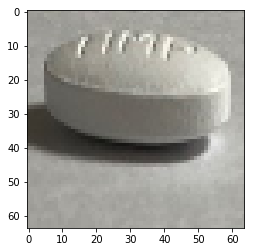

130 0 (64, 64, 3)


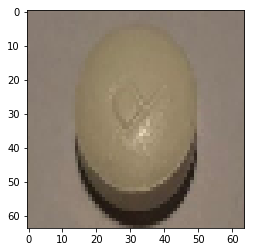

131 1 (64, 64, 3)


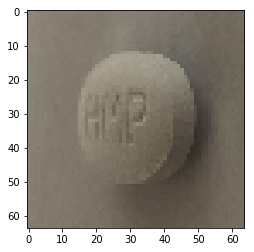

132 0 (64, 64, 3)


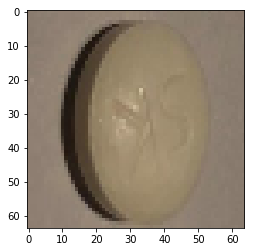

133 1 (64, 64, 3)


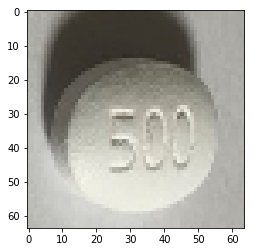

134 0 (64, 64, 3)


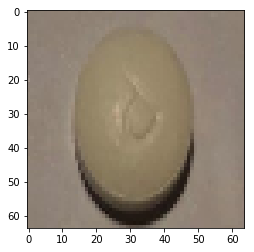

135 1 (64, 64, 3)


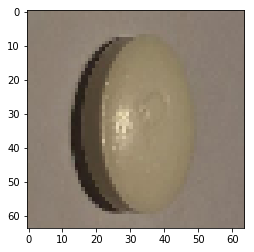

136 1 (64, 64, 3)


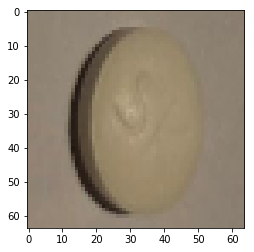

137 1 (64, 64, 3)


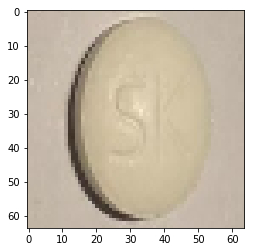

138 1 (64, 64, 3)


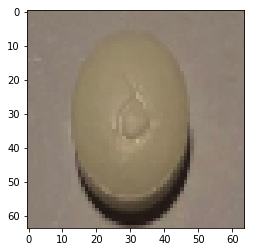

139 1 (64, 64, 3)


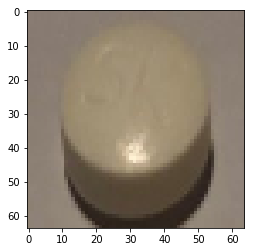

140 1 (64, 64, 3)


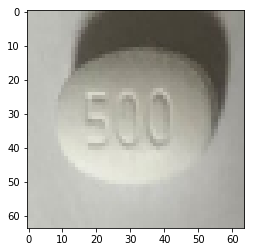

141 0 (64, 64, 3)


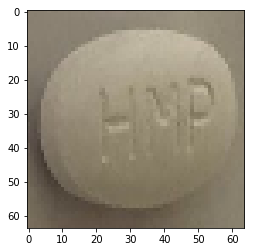

142 0 (64, 64, 3)


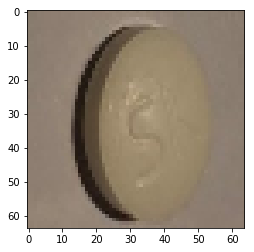

143 1 (64, 64, 3)


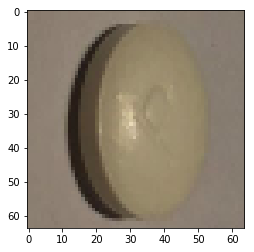

144 1 (64, 64, 3)


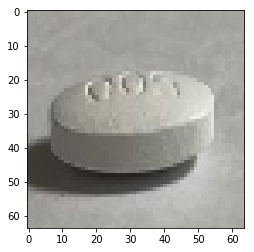

145 0 (64, 64, 3)


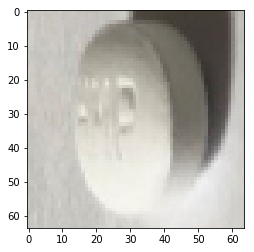

146 0 (64, 64, 3)


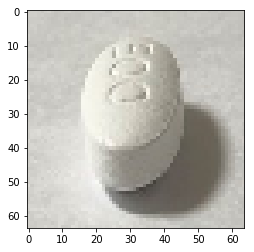

147 0 (64, 64, 3)


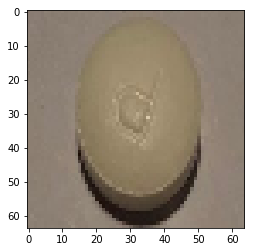

148 1 (64, 64, 3)


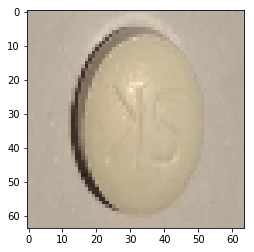

149 1 (64, 64, 3)


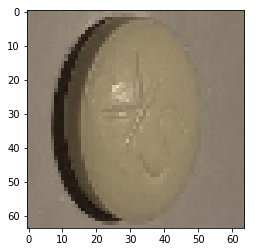

150 1 (64, 64, 3)


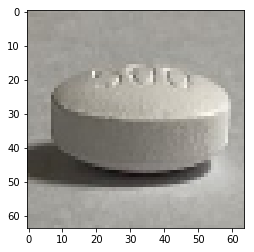

151 0 (64, 64, 3)


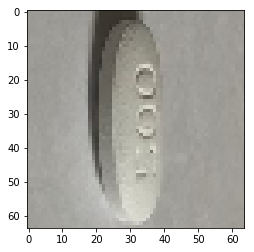

152 0 (64, 64, 3)


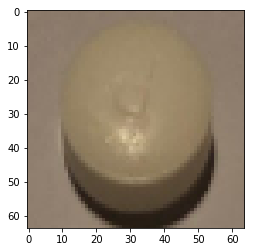

153 1 (64, 64, 3)


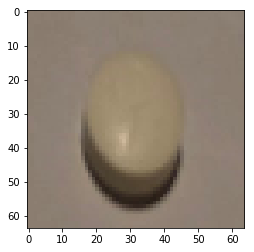

154 1 (64, 64, 3)


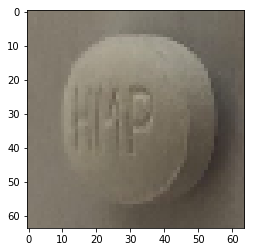

155 0 (64, 64, 3)


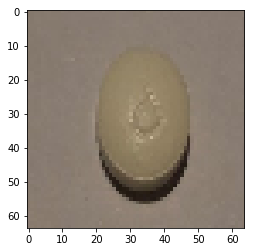

156 1 (64, 64, 3)


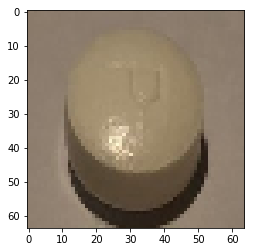

157 1 (64, 64, 3)


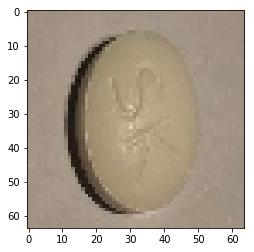

158 1 (64, 64, 3)


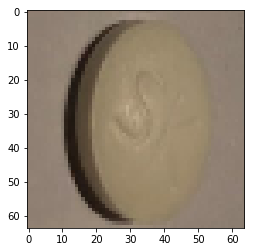

159 1 (64, 64, 3)


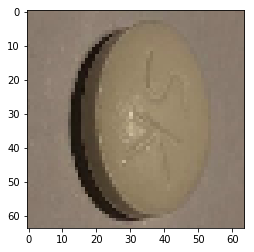

160 1 (64, 64, 3)


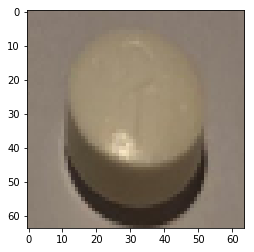

161 1 (64, 64, 3)


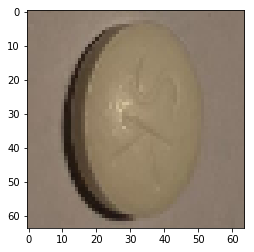

162 1 (64, 64, 3)


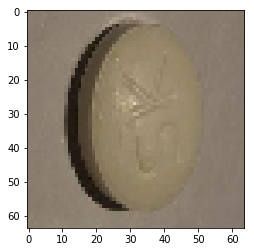

163 1 (64, 64, 3)


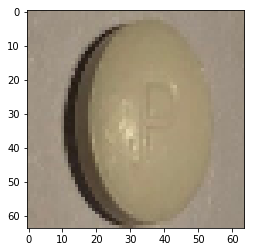

164 1 (64, 64, 3)


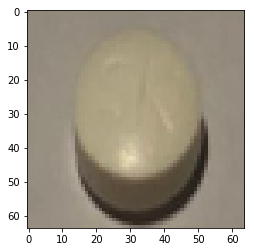

165 1 (64, 64, 3)


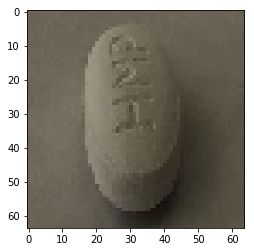

166 0 (64, 64, 3)


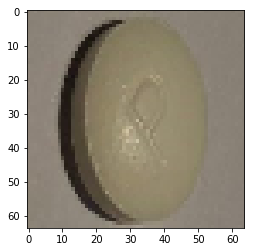

167 1 (64, 64, 3)


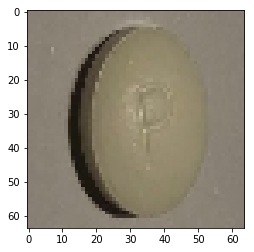

168 1 (64, 64, 3)


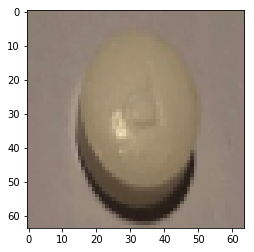

169 1 (64, 64, 3)


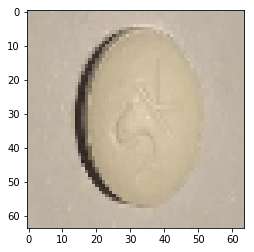

170 1 (64, 64, 3)


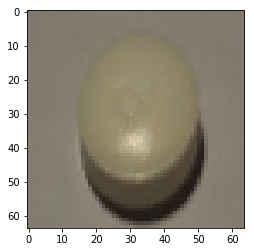

171 1 (64, 64, 3)


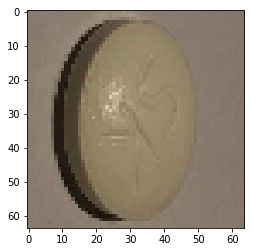

172 1 (64, 64, 3)


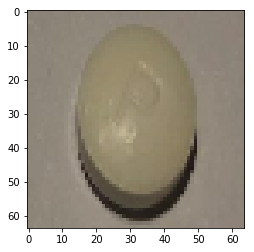

173 1 (64, 64, 3)


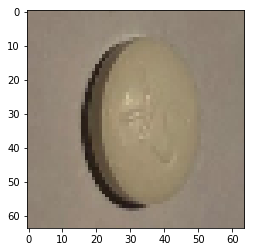

174 1 (64, 64, 3)


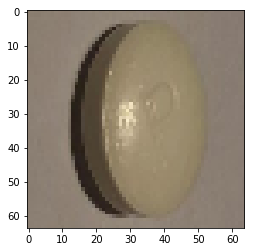

175 1 (64, 64, 3)


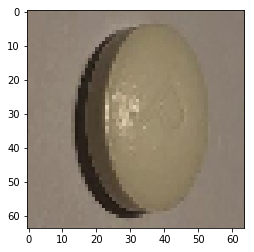

176 1 (64, 64, 3)


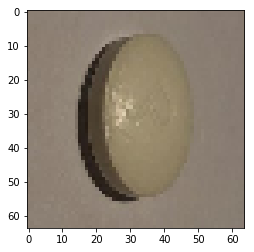

177 1 (64, 64, 3)


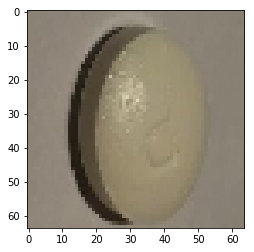

178 1 (64, 64, 3)


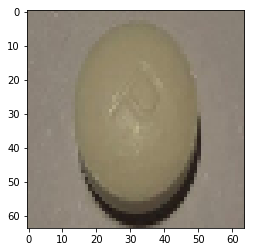

179 1 (64, 64, 3)


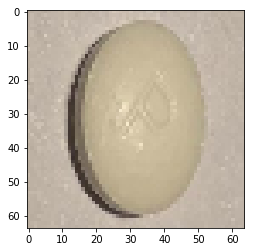

180 1 (64, 64, 3)


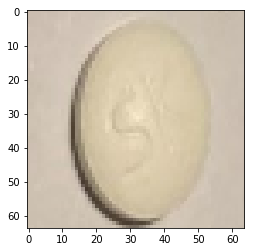

181 1 (64, 64, 3)


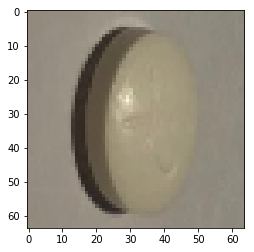

182 1 (64, 64, 3)


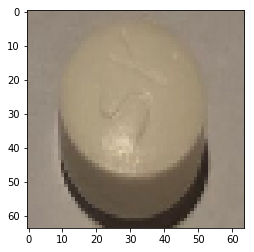

183 1 (64, 64, 3)


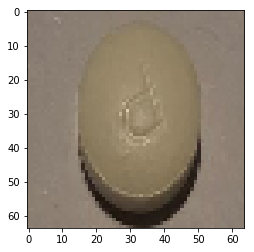

184 1 (64, 64, 3)


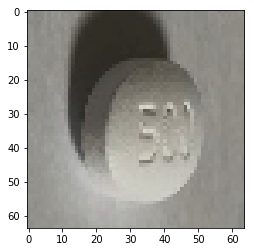

185 0 (64, 64, 3)


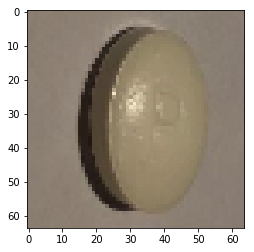

186 1 (64, 64, 3)


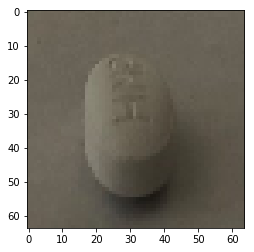

187 0 (64, 64, 3)


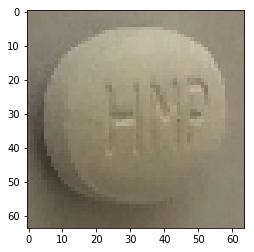

188 0 (64, 64, 3)


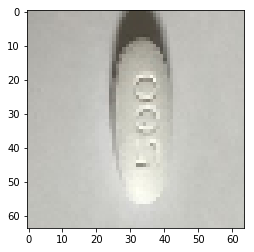

189 0 (64, 64, 3)


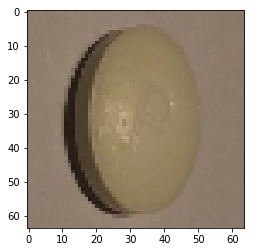

190 1 (64, 64, 3)


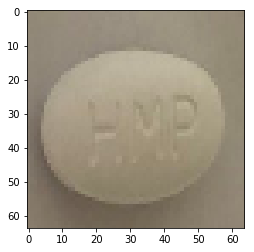

191 0 (64, 64, 3)


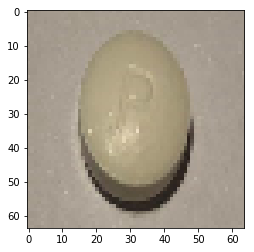

192 1 (64, 64, 3)


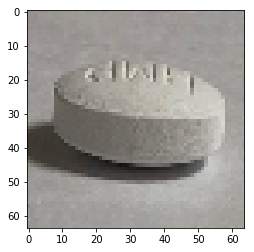

193 0 (64, 64, 3)


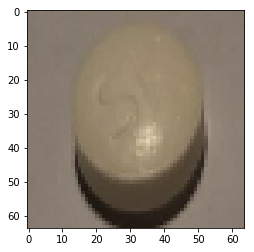

194 1 (64, 64, 3)


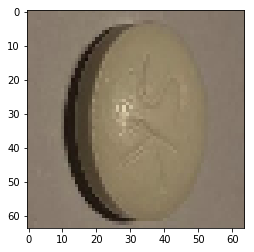

195 1 (64, 64, 3)


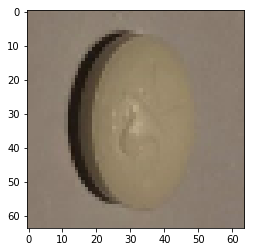

196 1 (64, 64, 3)


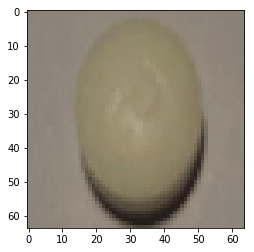

197 1 (64, 64, 3)


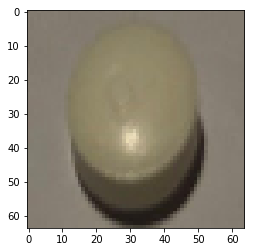

198 1 (64, 64, 3)


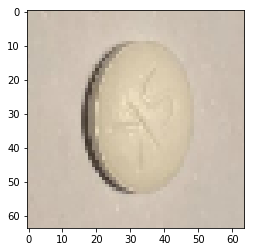

199 1 (64, 64, 3)


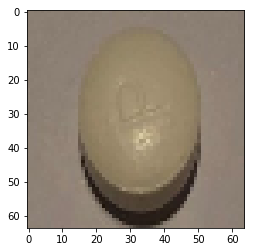

200 1 (64, 64, 3)


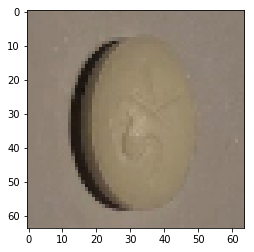

201 1 (64, 64, 3)


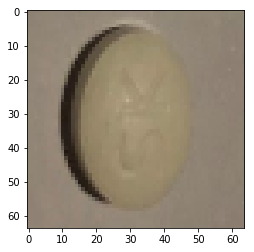

202 1 (64, 64, 3)


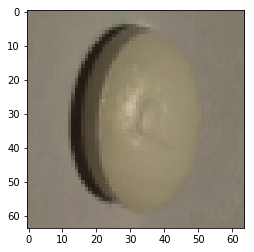

203 1 (64, 64, 3)


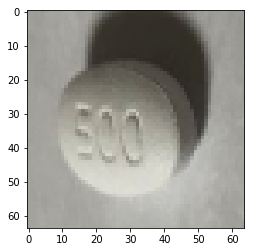

204 0 (64, 64, 3)


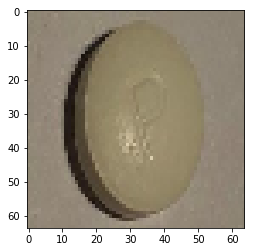

205 1 (64, 64, 3)


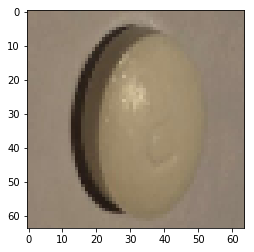

206 1 (64, 64, 3)


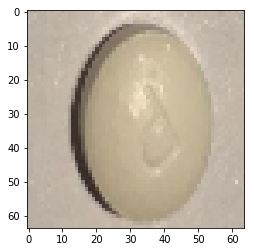

207 1 (64, 64, 3)


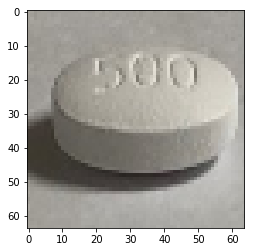

208 0 (64, 64, 3)


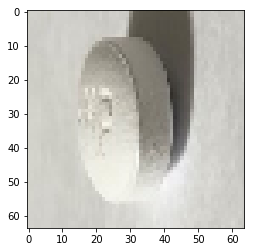

209 0 (64, 64, 3)


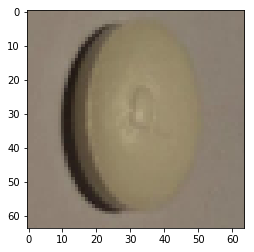

210 1 (64, 64, 3)


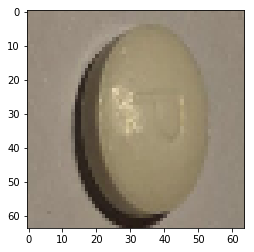

211 1 (64, 64, 3)


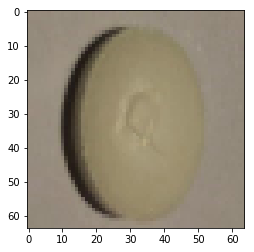

212 1 (64, 64, 3)


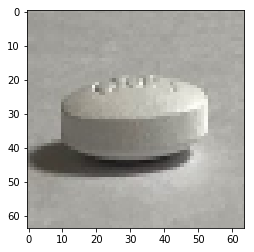

213 0 (64, 64, 3)


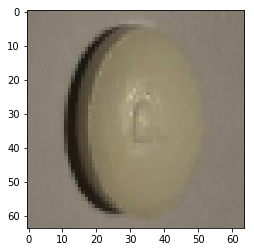

214 1 (64, 64, 3)


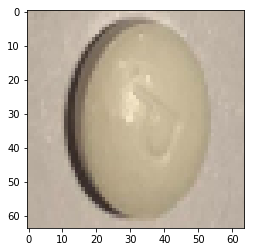

215 1 (64, 64, 3)


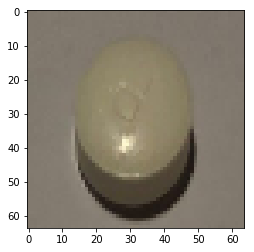

216 1 (64, 64, 3)


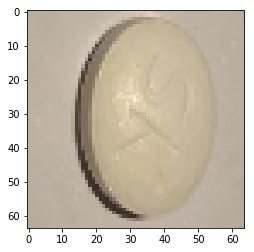

217 1 (64, 64, 3)


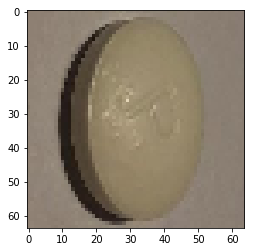

218 1 (64, 64, 3)


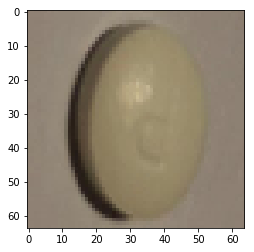

219 1 (64, 64, 3)


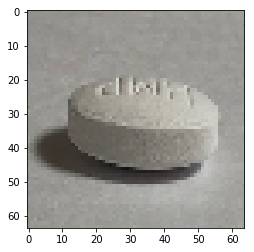

220 0 (64, 64, 3)


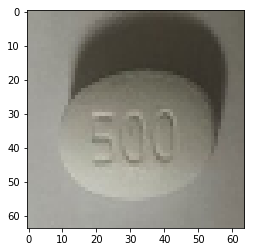

221 0 (64, 64, 3)


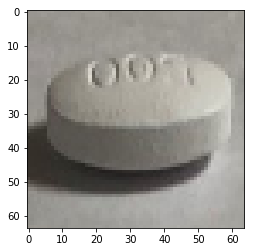

222 0 (64, 64, 3)


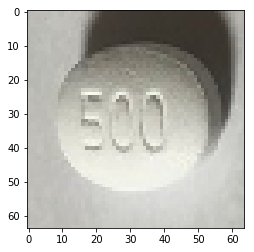

223 0 (64, 64, 3)


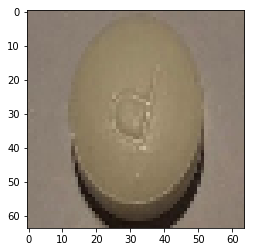

224 1 (64, 64, 3)


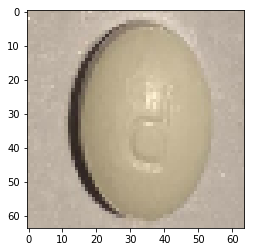

225 1 (64, 64, 3)


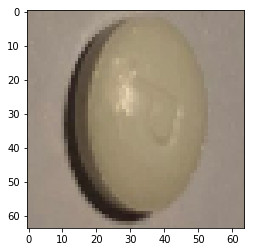

226 1 (64, 64, 3)


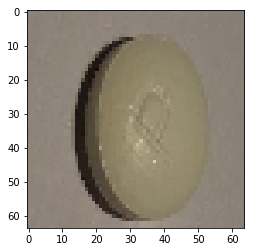

227 1 (64, 64, 3)


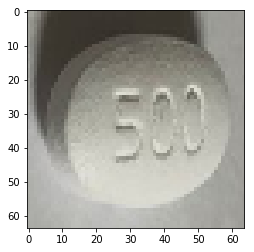

228 0 (64, 64, 3)


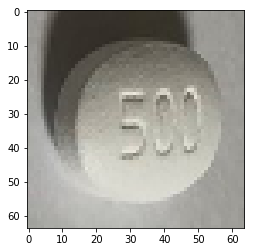

229 0 (64, 64, 3)


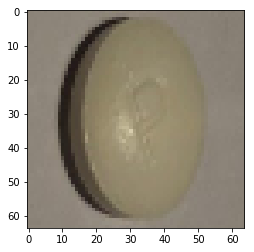

230 1 (64, 64, 3)


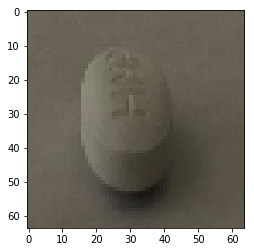

231 0 (64, 64, 3)


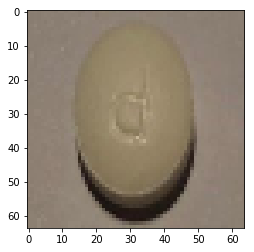

232 1 (64, 64, 3)


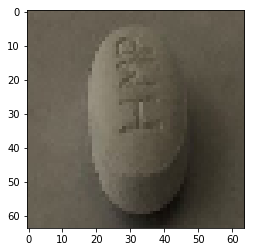

233 0 (64, 64, 3)


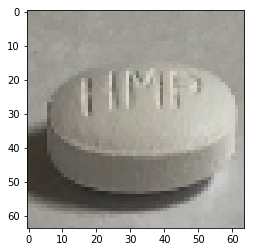

234 0 (64, 64, 3)


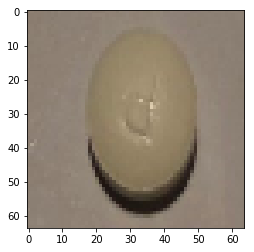

235 1 (64, 64, 3)


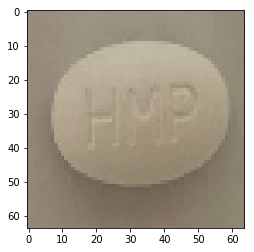

236 0 (64, 64, 3)


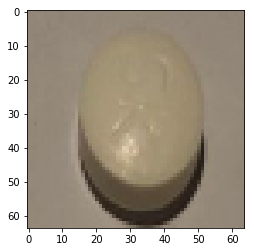

237 1 (64, 64, 3)


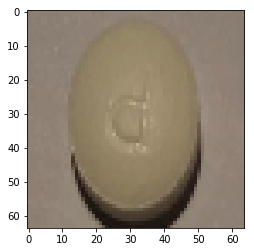

238 1 (64, 64, 3)


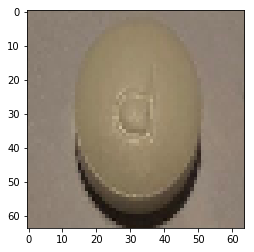

239 1 (64, 64, 3)


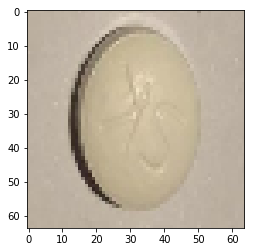

240 1 (64, 64, 3)


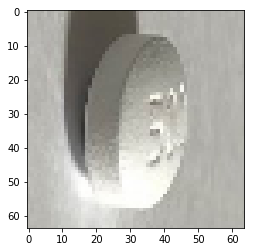

241 0 (64, 64, 3)


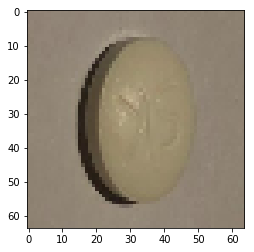

242 1 (64, 64, 3)


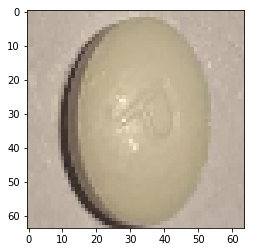

243 1 (64, 64, 3)


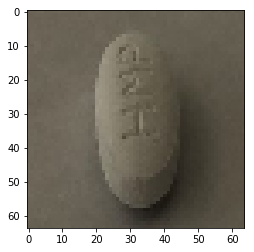

244 0 (64, 64, 3)


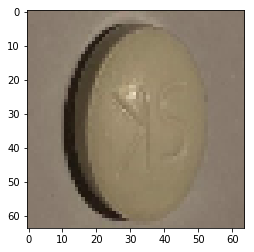

245 1 (64, 64, 3)


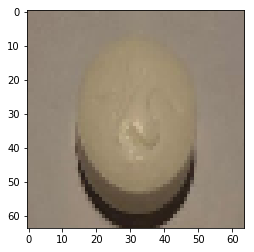

246 1 (64, 64, 3)


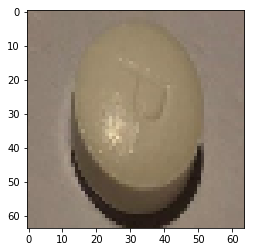

247 1 (64, 64, 3)


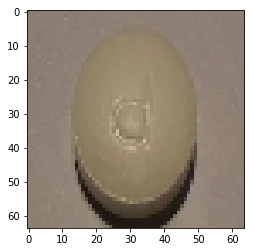

248 1 (64, 64, 3)


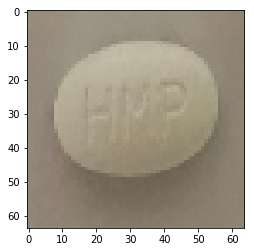

249 0 (64, 64, 3)


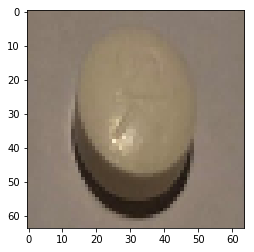

250 1 (64, 64, 3)


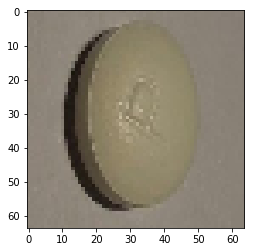

251 1 (64, 64, 3)


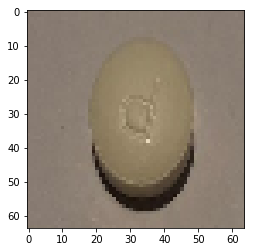

252 1 (64, 64, 3)


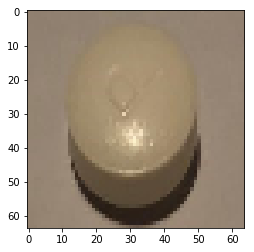

253 1 (64, 64, 3)


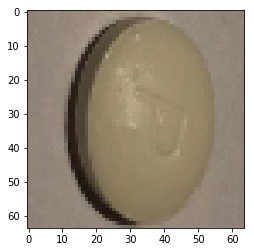

254 1 (64, 64, 3)


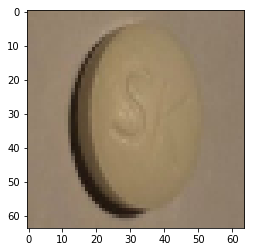

255 1 (64, 64, 3)


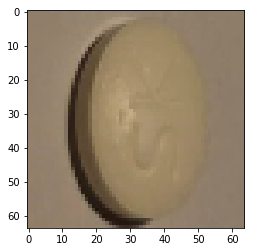

256 1 (64, 64, 3)


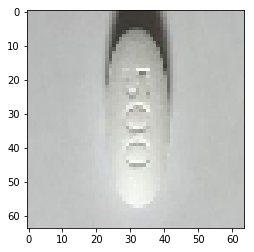

257 0 (64, 64, 3)


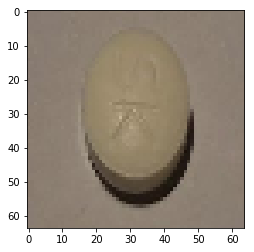

258 1 (64, 64, 3)


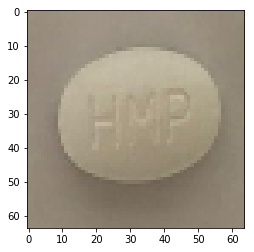

259 0 (64, 64, 3)


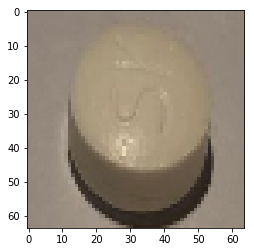

260 1 (64, 64, 3)


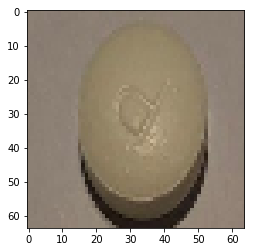

261 1 (64, 64, 3)


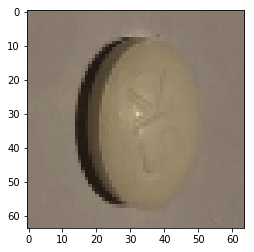

262 1 (64, 64, 3)


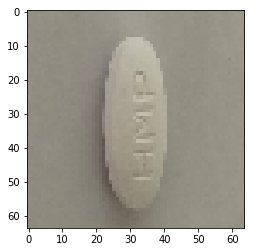

263 0 (64, 64, 3)


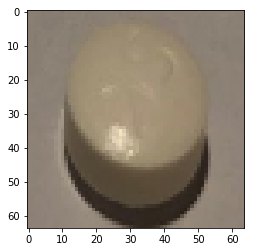

264 1 (64, 64, 3)


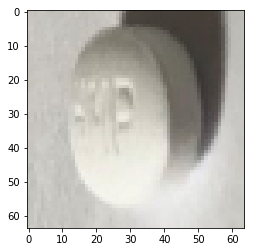

265 0 (64, 64, 3)


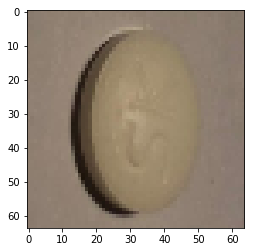

266 1 (64, 64, 3)


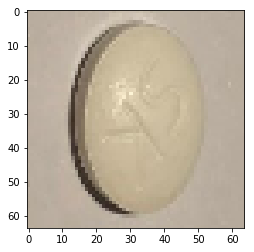

267 1 (64, 64, 3)


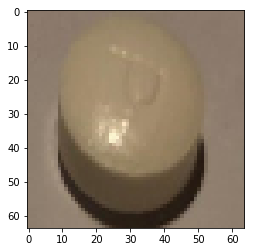

268 1 (64, 64, 3)


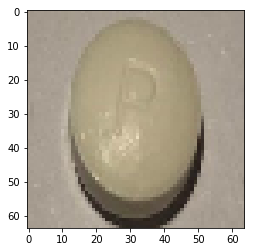

269 1 (64, 64, 3)


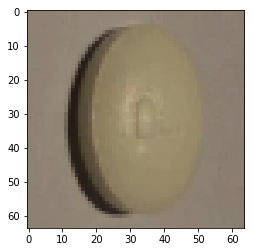

270 1 (64, 64, 3)


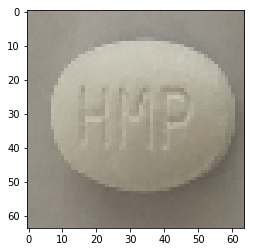

271 0 (64, 64, 3)


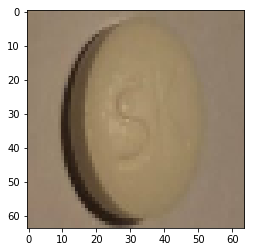

272 1 (64, 64, 3)


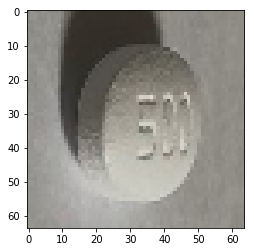

In [ ]:
main()